# Apprentissage supervisé - Classification

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import tensorflow as tf


ModuleNotFoundError: No module named 'tensorflow.examples'; 'tensorflow' is not a package

## 1 Préparation des données

1.1 Téléchargement de données

In [2]:
mnist = fetch_openml("mnist_784", version=1)
print(mnist.data.shape)

(70000, 784)


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

data contient les images sous forme de tableaux de 28 x 28 = 784 couleurs de pixel en niveau de gris, c'est-à-dire que la couleur de chaque pixel est représentée par un nombre entre 0 et 16 qui représente si celle-ci est proche du noir ou pas (0 = blanc, 16 = noir). 

 target qui contient les annotations (de 1 à 9) correspondant à la valeur "lue" du chiffre.

On dit ici que le nombre de features (ou dimensions) en entrée est de 28 x 28 x 1 = 784. Dans le cas où l'on aurait utilisé des images couleur et pas en niveaux de gris, on serait passé à 3 composantes couleurs par pixel (rouge, vert, bleu) et donc le nombre de features aurait été : 28 x 28 x 3 = 2352.

In [4]:
print (mnist.target.shape)

(70000,)


1.2 Information sur les données

#### 1. Le retour de la fonction "fetch_openml" est un dictionnaire (mnist). Affichez ces clés.


In [5]:
X, y = mnist["data"], mnist["target"]


#### 2. En utilisant les clés du dictionnaire "mnist", affichez :
• La taille des données (le nombre des features et la taille de chaque feature). Par convention,les données sont à stocker dans une variable "X".
• La taille des labels=classes (le nombre des labels). Par convention, les classes sont souvent à stocker dans une variable "y"
Les différentes classes de la base de données
• Une description détaillée de la base de données.

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
X.shape

(70000, 784)

il y a 70 000 images comportant chacune 784 valeurs

In [8]:
y.shape

(70000,)

les classes

In [9]:
set(y)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

la description de la base de données

In [10]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [11]:
# measures of central tendency 
mean = np.mean(mnist.data) 
median = np.median(mnist.data) 

# measures of dispersion 
min = np.amin(mnist.data) 
max = np.amax(mnist.data) 
range = np.ptp(mnist.data) 
varience = np.var(mnist.data) 
sd = np.std(mnist.data) 

print("Descriptive analysis") 
print("Array =", mnist.data) 
print("Measures of Central Tendency") 
print("Mean =", mean) 
print("Median =", median) 
print("Measures of Dispersion") 
print("Minimum =", min) 
print("Maximum =", max) 
print("Range =", range) 
print("Varience =", varience) 
print("Standard Deviation =", sd)

Descriptive analysis
Array = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Measures of Central Tendency
Mean = 33.385964741253645
Median = 0.0
Measures of Dispersion
Minimum = 0.0
Maximum = 255.0
Range = 255.0
Varience = 6186.510490639089
Standard Deviation = 78.65437362689433


3. A travers cette question, vous avez dû conclure que la base de données MNIST contient 70
000 images en niveau de gris, et chaque image est caractérisée par un features de taille 784
=28*28.
• Affichez l’image de la première instance de la base de données

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
some_digit = X[0]
print(some_digit.shape)
some_digit_image = some_digit.reshape(28, 28)

(784,)


<function matplotlib.pyplot.show(close=None, block=None)>

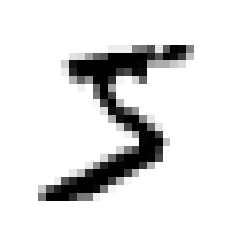

In [14]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show

Affichez la classe de la première instance

In [15]:
y[0]

'5'

### 4 Affichez le type des labels (du premier label par exemple)

LABEL = CLASSE = target

In [16]:
type(y[0])

str

5 A travers la question précédente, vous avez dû remarquer que le type des labels est
une chaîne de caractères. Il est préférable, dans les projets d’apprentissage automatique,
d’utiliser des chiffres. Par conséquent, appliquez le casting sur les labels pour les transformer
à des entiers.

In [17]:
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

1.3 Répartition des données

In [18]:
from sklearn.datasets import *
import pandas as pd
%matplotlib inline

In [19]:
digit = load_digits()
dig = pd.DataFrame(digit['data'][0:1700])
dig.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


# 1.3 Répartition des données

Contrairement aux précédents projets, les données dans MNIST sont déjà partitionnées en
base d’apprentissage et en base de test. Les 60 000 premières images composeront la base
d’apprentissage et le reste des images constituera la base de test. Écrivez un code qui met en
exergue cette répartition tout en stockant les données de test/d’apprentissage et les classes de
test/d’apprentissage dans 4 variables.

In [20]:
X_test,X_train = X[60000:],X[:60000]
y_test,y_train = y[60000:],y[:60000]


print(X_train.shape)

print(X_test.shape)


(60000, 784)
(10000, 784)


## Apprentissage d’un classifieur binaire

Comme indiqué dans les objectifs, ce projet vise à classifier les chiffres. Une des solutions est
d’utiliser un classifieur binaire qui est apte d’identifier que l’image représente bien le chiffre que
nous cherchons ou non. Par exemple, nous nous focaliserons sur la reconnaissance du chiffre 5

### 2.1 Apprentissage des données

En utilisant les labels d’apprentissage et de test, écrivez un code qui stocke dans deux variables
(une première pour la base d’apprentissage et une autre pour la base de test) distinctes
True si le classe de l’instance est 5 et False Sinon. De ce fait, nous traitons une classification
binaire.

Pour l’apprentissage des données, nous allons utiliser le classifieur Stochastic Gradient Descent
(SGD). Utiliser ce modèle pour la prédiction sur un chiffre (exemple 5).

In [21]:
y_train_5 = ( y_train==5)
y_test_5 = ( y_test == 5)

display(y_train_5)
display(y_test_5)

array([ True, False, False, ...,  True, False, False])

array([False, False, False, ..., False,  True, False])

#from sklearn.linear_model import SGDClassifier
#sgd_clf = SGDClassifier()


#print(X_train.shape)
#print(y_train_5.shape)
#sgd_clf.fit(X_train, y_train_5)


#sgd_clf.predict(X_train[[-3]])


#sgd_clf.score(X_train, y_train)

In [22]:
model = SGDClassifier()

In [23]:
model.fit(X_train, y_train_5)

SGDClassifier()

In [24]:
print(X_train.shape)
print(y_train_5.shape)

(60000, 784)
(60000,)


In [25]:
y_pred = model.predict(X_train[[0]])
y_pred

array([False])

In [26]:
model.score(X_train, y_train)

0.09795

### 2.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

La mesure de performance d’une méthode de classification est souvent plus délicate qu’une méthode
de régression. Cela est dû au nombre de mesures de performance existantes dans la littérature.

### 2.2.1 Taux de classification

1. Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de
validation en utilisant la méthode 3-fold cross-validation. Optez pour la valeur "accuracy"
pour l’argument "scoring" pour afficher :
• le taux de classification (accuracy) de chaque fold
• la moyenne des taux de classification


In [27]:
scores = cross_val_score(model, X_train, y_train_5, scoring="accuracy", cv=3)
scores


array([0.9694 , 0.95885, 0.95035])

In [28]:
scores.mean()

0.9595333333333333

2.Dans cette question, vous allez créer un classifieur simple qui classifie toutes les images de
MNIST comme "non-5". Créez une classe Never5Classifier qui hérite de la classe BaseEstimator.
la classe BaseEstimator existe dans le sous-module "base" du module "sklearn"

class Never5Classifier(BaseEstimator):
  

QUAND ON ENTRAINE NOTRE MODELE MEME AVEC UNE VALEUR FALSE 
UNE BONNE ACCURACY
parce qu'on a quand même 9 chiffres sur 10 qui ne sont pas des 5, donc 90% de réussite quand même

3. Dans la classe Never5Classifier, créez :
• Une méthode fit qui prend en argument les données et les labels. Cette méthode ne va
rien retourner et par conséquent va contenir que le mot-clé "pass". Vous allez implémenter
cette méthode car l’héritage de la classe BaseEstimator l’exige
• Une méthode predict qui prend en argument les données et retourne une structure de
données ayant la taille des données et qui contient que la valeur False (= non-5). Utilisez
la fonction "zeros" du module "numpy" avec un "dtype=bool"

In [29]:
class Never5Classifier(BaseEstimator):
    def fit(self,X, y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)
    #LE 1 c'est la 2 dimension
    #dtype = bool> true ou false, le 5= True
object_no_5 = Never5Classifier()
object_no_5.fit(X_train, y_train_5)


4. Créez un objet de la classe Never5Classifier

In [30]:
object_no_5 = Never5Classifier()
object_no_5.fit(X_train, y_train_5)

5. Testez le classifieur en utilisant une validation croisée de type 3-fold cross-validation. Optez
pour la valeur "accuracy" pour l’argument "scoring" pour afficher : le taux de classification
(accuracy) de chaque fold; La moyenne des taux de classification.

In [31]:
scores = cross_val_score(object_no_5, X_train, y_train_5, scoring="accuracy", cv=3)

In [32]:
scores.mean()

0.90965

### 2.2.2 Matrice de confusion:

1. En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données d’apprentissage. Pour ce faire, utilisez la fonction "cross_val_predict" du sous-module "model_selection" du module "sklearn". Optez pour une validation croisée de type 3-fold cross validation.

In [33]:
y_train_pred = cross_val_predict(model, X_train, y_train_5, cv=3)

2. Affichez la matrice de confusion du modèle d’apprentissage. Veillez à bien interpréter la
matrice de confusion.

In [34]:
confusion_matrix(y_train_5, y_train_pred)

array([[53091,  1488],
       [ 1348,  4073]], dtype=int64)

### 2.2.3 Précision et rappel:

1. Calculez la précision, le rappel et le score F1 du modèle d’apprentissage

In [35]:
precision_score(y_train_5, y_train_pred)

0.7324222262183061

In [36]:
recall_score(y_train_5, y_train_pred)

0.7513373916251614

In [37]:
f1_score(y_train_5, y_train_pred)

0.7417592423966491

https://medium.com/@EduardoSaverin/confusion-matrix-614be4ff4c9e

2 .Pour classifier les instances, le classifieur SGD calcule un score en se basant sur sa fonction
de décision. Si le score est supérieur à un seuil, il affecte la classe positive à l’instance
sinon il affecte la classe négative. Affichez les scores des différentes instances de la
base d’apprentissage via la fonction "cross_val_predict". Optez pour une valeur de "decision_
function" pour l’argument "method" et une validation croisée de type 3-fold crossvalidation.

In [38]:
y_score = cross_val_predict(model, X_train, y_train_5, method= 'decision_function', cv=3)
y_score

array([  8676.08098652, -17417.33467983, -24969.88590952, ...,
         3663.45348337,  -3426.20573454, -10411.76542809])

3. Calculez les précisions et les rappels de chaque instance en utilisant la fonction "precision_
recall_curve"

In [39]:
precision_recall_curve(y_train_5, y_score)

(array([0.09061884, 0.09060363, 0.09060515, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-68329.78089267, -68277.38533684, -68063.55184063, ...,
         34507.41198667,  35947.8450416 ,  41088.98832983]))

4- Tracez la courbe des précisions/rappels. L’axe des abscisses doit contenir les rappels et l’axe
des ordonnées doit contenir les précisions. Interprétez les résultats.

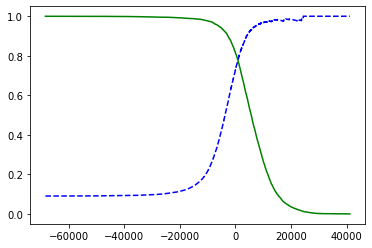

In [40]:
precision, recall, threshold = precision_recall_curve(y_train_5, y_score)

def plot_precision_recall_vs_threshold (precision, recall, threshold):

    plt.plot(threshold, precision[:-1], "b--", label="Precision")
    plt.plot(threshold, recall[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precision, recall, threshold)

plt.show()

### 2.2.4 Courbe ROC:

1 Calculez le taux de faux positifs (tfp), le taux de vrais positifs (tvp) et les seuils utilisés pour
classifier les données d’apprentissage. Pour ce faire, utilisez la fonction "roc_curve" du sousmodule
"metrics" du module "sklearn"

In [41]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = roc_curve(y_train_5, y_score)

In [42]:
#frp false positif rate, tpr true positif rate
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.99673867, 0.99673867,
        1.        ]),
 array([0.00000000e+00, 1.84467810e-04, 1.27282789e-02, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  41089.98832983,   41088.98832983,   24368.57284243, ...,
         -68277.38533684,  -68329.78089267, -144374.0724759 ]))

2 - Tracez la courbe des ROC. L’axe des abscisses doit contenir les taux de faux positifs et l’axe
des ordonnées doit contenir les taux de vrais positifs. Ajoutez des titres à ces deux axes et
activer le mode "grid" avec la fonction grid de matplotlib

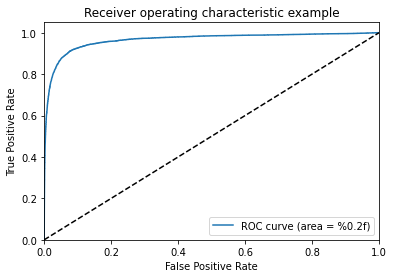

In [43]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

3-Calculez l’AUC (Area Under the Curve) du modèle d’apprentissage. Pour ce faire, utilisez
la fonction "roc_auc_score" du sous-module "metrics" du module "sklearn".

In [44]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9653437037101479

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_score)

0.9653437037101479

## 3 Apprentissage d’un classifieur multi-classes

Dans cette partie, nous allons apprendre un classifieur à classifier les 10 classes (les chiffres de 0 à
9) de la base de données MNIST.

3.1 Apprentissage des données

1. En se basant sur le classifieur SGD, faites l’apprentissage du modèle en se basant sur toutes
les instances (images) d’apprentissage. Ainsi le modèle va apprendre à partir de toutes les
classes de la BD et non pas juste à partir de deux classes comme c’était le cas dans la partie
II de TP.

In [46]:
model = SGDClassifier()

In [47]:
model.fit(X_train, y_train)

SGDClassifier()

2. Via le modèle d’apprentissage bâti, prédisez la classe de la première instance de la base de
données (celle de la question 3). La prédiction va être, cette fois-ci, un chiffre de 0 à 9.

In [48]:
model.predict([some_digit])

array([5], dtype=uint8)

3. En utilisant l’objet qui instancie la classe SGDClassifier :
• Affichez, via la méthode "decision_function", les 10 scores de décision utilisés par la
méthode SGD pour classifier la première instance de la base de données.
• Affichez, via l’attribut "classes_", les différentes classes utilisées par le classifieur. Qu’est
ce que vous remarquez ?

In [49]:
from sklearn.svm import SVC
model.decision_function([some_digit])

array([[-19656.50112923, -24065.00988014,  -8095.89502626,
         -2605.56038613, -41323.93145304,   1788.34844959,
        -18740.35123296, -16759.51668758,  -7691.17959059,
        -10768.21778062]])

In [50]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

le classifacteur range chaque attribut dans la classe 
score pertinent pour la classe 3

3.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

3.2.1 Taux de classification

1. Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de
validation en utilisant la méthode 3-fold cross-validation. Optez pour la valeur "accuracy"
pour l’argument "scoring" pour afficher : le taux de classification (accuracy) de chaque fold;
la moyenne des taux de classification

In [51]:
scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=3)
scores

array([0.8762 , 0.87655, 0.8849 ])

2. Une des techniques d’amélioration des taux de classification est le "Scaling". Vérifiez ceci
en appliquant une standardisation sur les données d’apprentissage avec la classe StandartScaler.

In [52]:
scores.mean()

0.8792166666666666

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(model, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9007 , 0.89295, 0.8986 ])

quand on normailise toutes les données de depart, in se rend compte que nos données sont encore améliorées

3. Évaluez le modèle sur les nouvelles données d’apprentissage avec une validation croisée de
type 3-fold cross-validation. Les résultats sont-ils meilleurs que ceux avant le Scaling?

3.2.2 Matrice de Confusion

1. En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données
d’apprentissage.

In [ ]:
y_train_pred = cross_val_predict(model, X_train_scaled, y_train, cv=3)

2. Affichez la matrice de confusion du modèle d’apprentissage. Pour ce faire, utilisez la fonction
"confusion_matrix" du sous-module "metrics" du module "sklearn". La taille de la matrice
de confusion, cette fois-ci, est 10x10 car on traite un problème de classification de 10
classes. Interprétez les résultats.

In [ ]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
http://www2.agroparistech.fr/ufr-info/membres/cornuejols/Teaching/ENSTA/tp-rn-ensta-2018.pdf
    

In [ ]:
https://medium.com/@vineetrajparashar25/recognizing-handwritten-digits-e0f99561832c

In [ ]:
http://www2.agroparistech.fr/ufr-info/membres/cornuejols/Teaching/ENSTA/tp-rn-ensta-2018.pdf

In [ ]:
https://medium.com/@vineetrajparashar25/recognizing-handwritten-digits-e0f99561832c

In [ ]:
https://scikit-learn.org/stable/modules/sgd.html

In [ ]:
https://www.datacorner.fr/model-class-evaluatation/

In [ ]:
https://www.geeksforgeeks.org/python-pandas-series-astype-to-convert-data-type-of-series/

In [ ]:
https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4022441-entrainez-votre-premier-k-nn

In [ ]:
https://mrmint.fr/mnist-knn-handwritten-tutorial

In [ ]:
http://maths.cnam.fr/IMG/pdf/Classification-2008-2.pdf